<a href="https://colab.research.google.com/github/abhisheksaha28/Final_year_project/blob/main/DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from tkinter import *

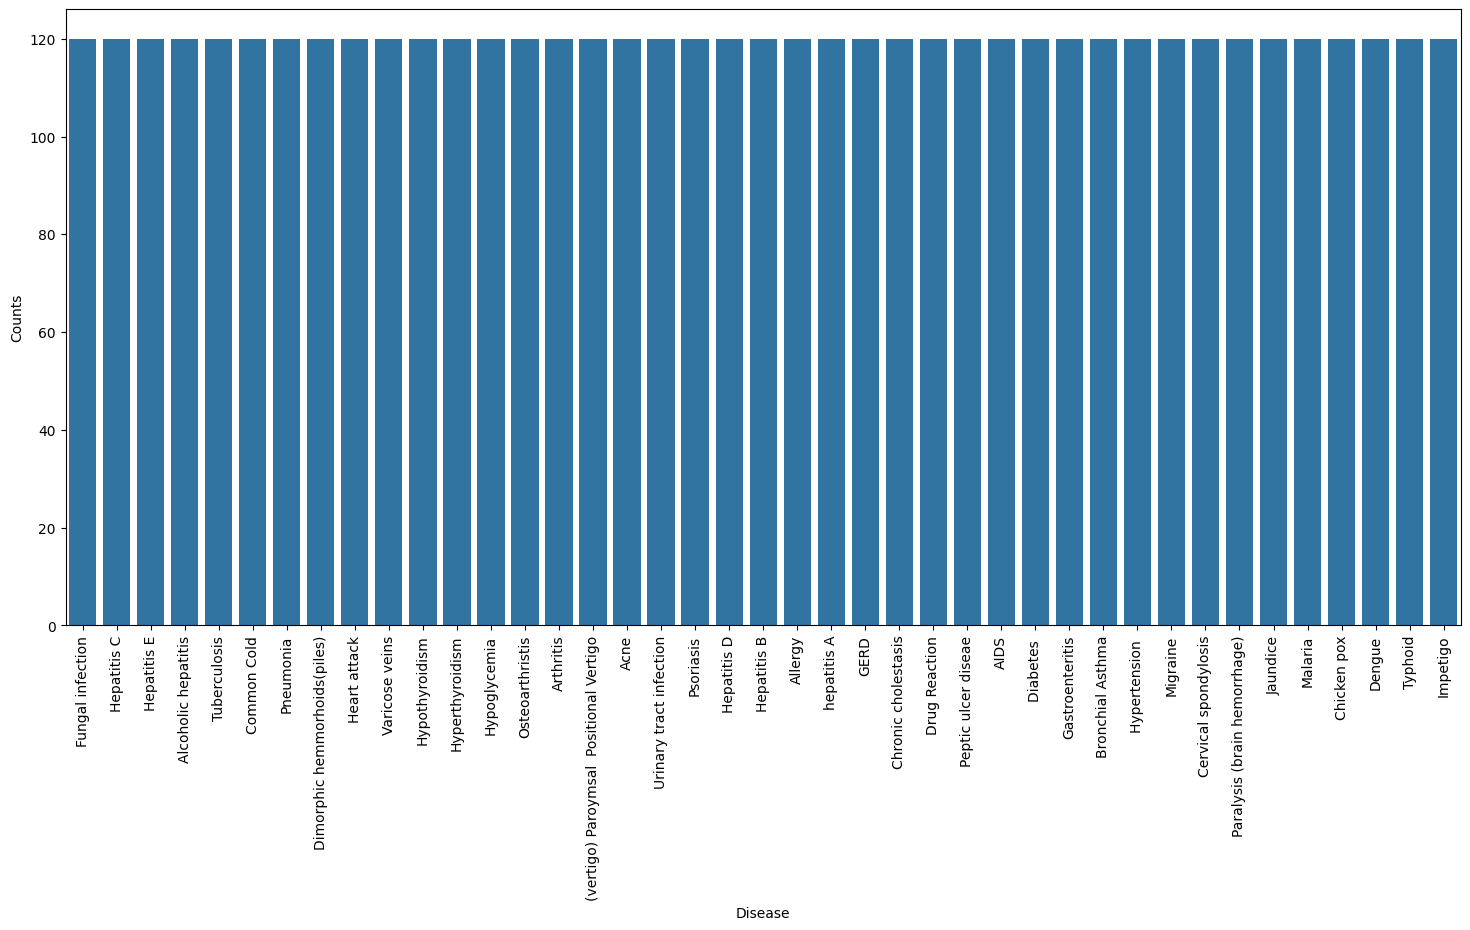

In [4]:
# Reading the train.csv by removing the last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.081, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test 2: {X_test.shape}, {y_test.shape}")

Train: (4521, 132), (4521,)
Test 2: (399, 132), (399,)


In [7]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return f1_score(y, estimator.predict(X), average='weighted')

# Initializing Models
models = {
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(random_state=18),
    "Gaussian Naive Bayes Classifier":GaussianNB(),
    "Support Vector Classifier":SVC(),
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"F1 Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

Decision Tree Classifier
F1 Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest Classifier
F1 Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian Naive Bayes Classifier
F1 Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Support Vector Classifier
F1 Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by Decision Tree Classifier: 100.0
Accuracy on test data by Decision Tree Classifier: 100.0


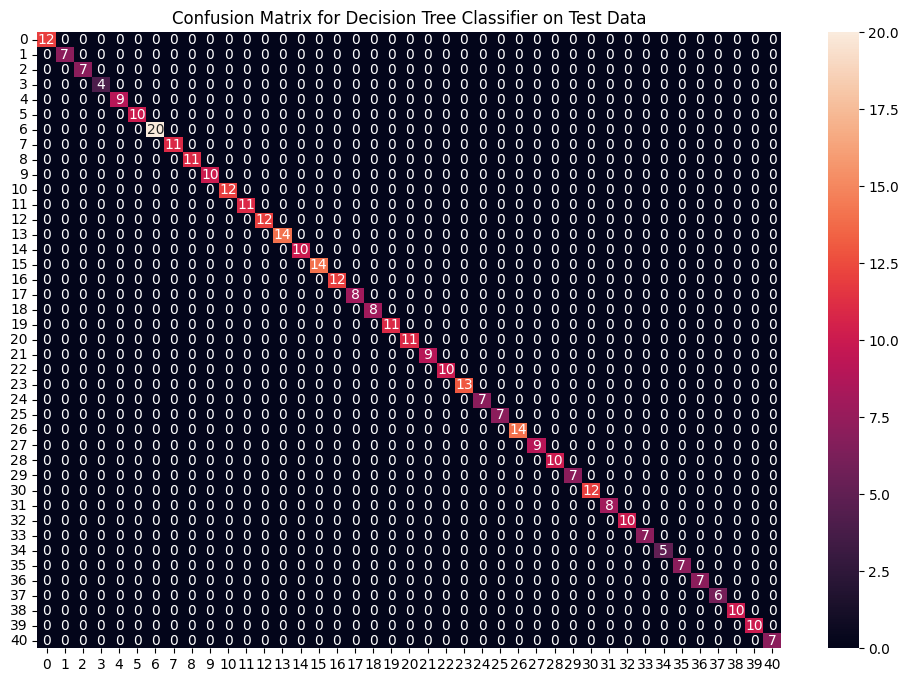

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


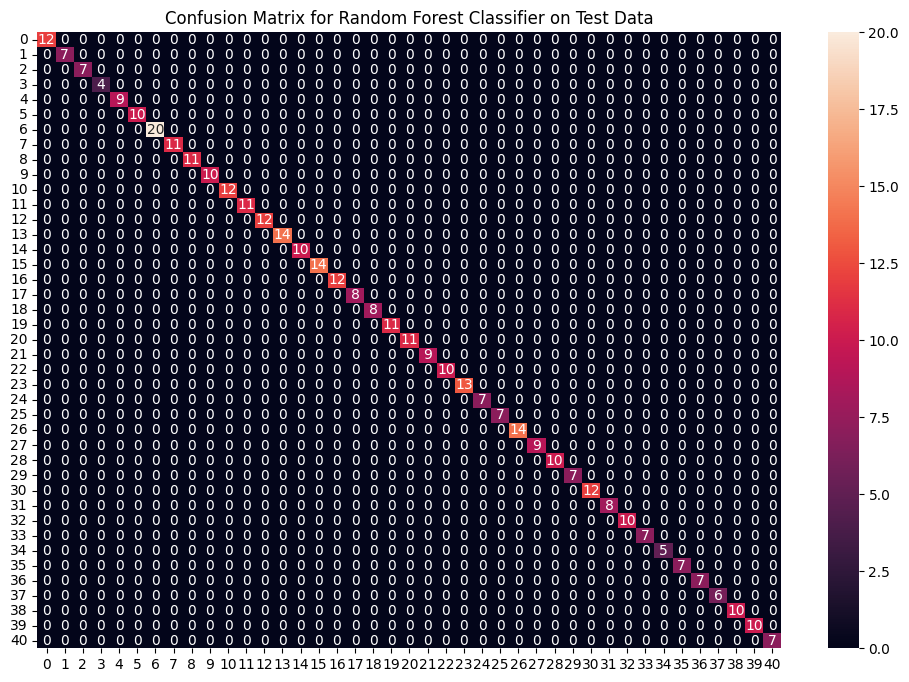

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


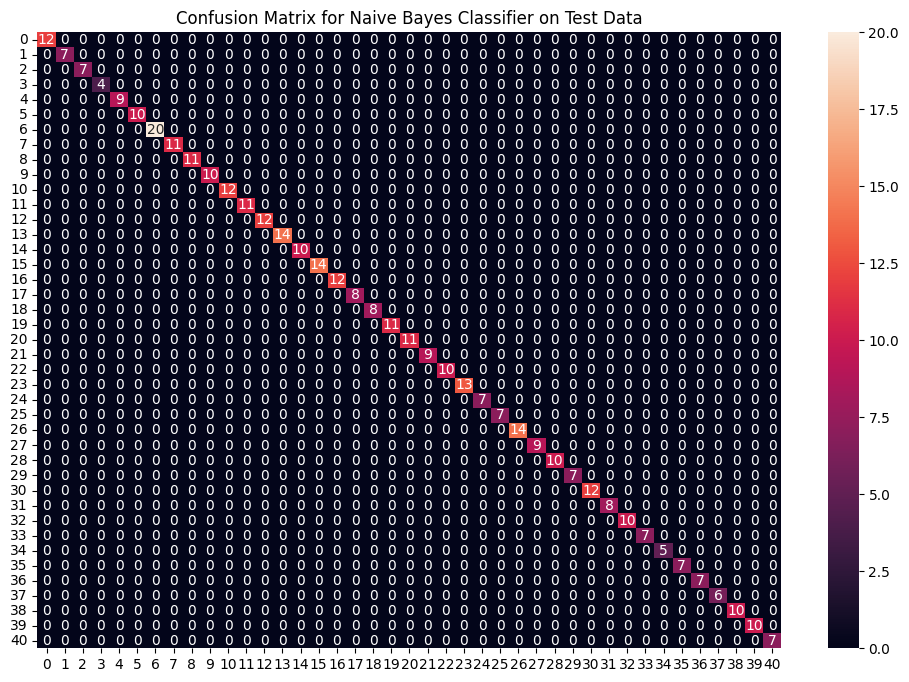

Accuracy on train data by Support Vector Classifier: 100.0
Accuracy on test data by Support Vector Classifier: 100.0


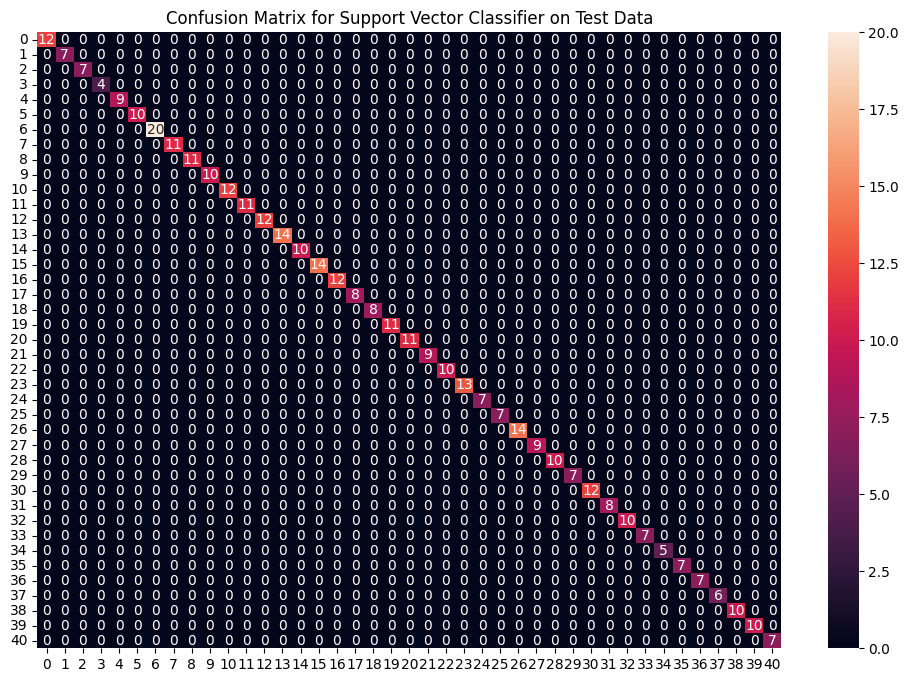

In [8]:
# Training and testing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
preds = decision_tree_model.predict(X_test)

print(f"Accuracy on train data by Decision Tree Classifier\
: {f1_score(y_train, decision_tree_model.predict(X_train), average='weighted')*100}")

print(f"Accuracy on test data by Decision Tree Classifier\
: {f1_score(y_test, preds, average='weighted')*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {f1_score(y_train, rf_model.predict(X_train), average='weighted')*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {f1_score(y_test, preds, average='weighted')*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {f1_score(y_train, nb_model.predict(X_train), average='weighted')*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {f1_score(y_test, preds, average='weighted')*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Support Vector Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by Support Vector Classifier\
: {f1_score(y_train, svm_model.predict(X_train), average='weighted')*100}")

print(f"Accuracy on test data by Support Vector Classifier\
: {f1_score(y_test, preds, average='weighted')*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Support Vector Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


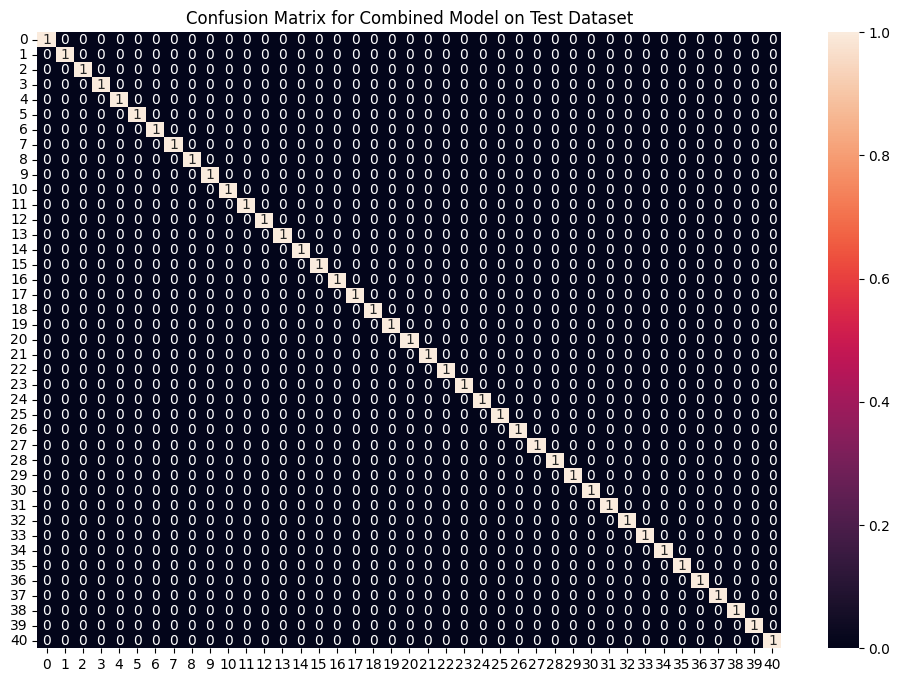

In [9]:
# Initilizing the models once again to train on the entire dataset
final_decision_tree_model = DecisionTreeClassifier()
final_rf_model = RandomForestClassifier(random_state=18)
final_nb_model = GaussianNB()
final_svm_model = SVC()

# Training the models on the full dataset
final_decision_tree_model.fit(X.values, y.values)
final_rf_model.fit(X.values, y.values)
final_nb_model.fit(X.values, y.values)
final_svm_model.fit(X.values, y.values)

# Reading Test_Data-1:
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions made by all the classifiers
decision_tree_preds = final_decision_tree_model.predict(test_X.values)
rf_preds = final_rf_model.predict(test_X.values)
nb_preds = final_nb_model.predict(test_X.values)
svm_preds = final_svm_model.predict(test_X.values)

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(decision_tree_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {f1_score(test_Y, final_preds, average='weighted')*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [10]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    decision_tree_prediction = data_dict["predictions_classes"][final_decision_tree_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, decision_tree_prediction, svm_prediction])
    predictions = {
        "decision_tree_model_prediction": decision_tree_prediction,
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'decision_tree_model_prediction': 'Fungal infection', 'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


In [14]:
!pip install gradio

import gradio as gr

# def predict_disease_gradio(symptoms):
#     predictions = predictDisease(symptoms)
#     return predictions

def predict_disease_gradio(symptoms):
    try:
        predictions = predictDisease(symptoms)
        return predictions
    except Exception as e:
        return f"Error: {e}"

# iface = gr.Interface(
#     fn=predict_disease_gradio,
#     inputs=gr.Textbox(lines=2, placeholder="Enter symptoms separated by commas"),
#     outputs="text",
#     title="Disease Prediction",
#     description="Enter symptoms and get a prediction."
# )
iface = gr.Interface(
    fn=predict_disease_gradio,
    inputs=gr.Textbox(lines=2, placeholder="Enter symptoms separated by commas"),
    outputs= gr.Textbox(),  # or gr.Textbox() to display as formatted text
    title="Disease Prediction",
    description="Enter symptoms and get a prediction."
)

iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6293f6904c8537db59.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://6293f6904c8537db59.gradio.live


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics # Use statistics.mode instead of scipy.stats.mode
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr


# Assuming 'data' and 'encoder' are already defined from previous code
# ...

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptoms = data.columns.values[:-1]  # Exclude 'prognosis' column
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])

    for symptom in symptoms:
        try:
            index = data_dict["symptom_index"][symptom.strip()]  # Strip whitespace
            input_data[index] = 1
        except KeyError:
            print(f"Warning: Symptom '{symptom.strip()}' not found in the symptom index.")
            # Optionally, you could return an error message here

    # reshaping the input data and converting it into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    decision_tree_prediction = data_dict["predictions_classes"][final_decision_tree_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, decision_tree_prediction, svm_prediction])  # Use statistics.mode
    predictions = {
        "decision_tree_model_prediction": decision_tree_prediction,
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions


def predict_disease_gradio(selected_symptoms):
    num_symptoms = len(selected_symptoms)

    if num_symptoms < 3:
        return "Error: Please select at least 3 symptoms.", "", "", "", ""  # Return error message
    elif num_symptoms > 10:
        return "Error: Please select a maximum of 10 symptoms.", "", "", "", ""  # Return error message
    else:
        # Convert selected symptoms to comma-separated string
        symptoms_str = ','.join(selected_symptoms)

        # Rest of the prediction logic remains the same

        symptoms_list = [s.strip() for s in symptoms_str.split(",")]
        invalid_symptoms = [s for s in symptoms_list if s not in data_dict["symptom_index"]]

        if invalid_symptoms:
            return f"Error: Invalid symptoms: {', '.join(invalid_symptoms)}"

        predictions = predictDisease(symptoms_str)

        return predictions["decision_tree_model_prediction"], predictions["rf_model_prediction"], predictions["naive_bayes_prediction"], predictions["svm_model_prediction"], predictions["final_prediction"]

iface = gr.Interface(
    fn=predict_disease_gradio,
    inputs=gr.CheckboxGroup(choices=list(data_dict["symptom_index"].keys()), label="Select Symptoms (3-10)"),
    outputs=[
        gr.Textbox(label="Decision Tree Prediction"),
        gr.Textbox(label="Random Forest Prediction"),
        gr.Textbox(label="Naive Bayes Prediction"),
        gr.Textbox(label="SVM Prediction"),
        gr.Textbox(label="Final Prediction")
    ],  # List of Textboxes for each model
    title="Disease Prediction",
    description="Enter symptoms and get a prediction.",
    # examples=[["Itching,Skin Rash,Nodal Skin Eruptions"], ["Muscle Pain,Headache,Fatigue"]]
)

iface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5c9bb63338efd2399c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
